## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

## Import the Datasets

In [2]:
titanic_train = pd.read_csv('datasets/train.csv')
titanic_test = pd.read_csv('datasets/test.csv')

## Exploratory Data Analysis

In [3]:
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [4]:
# First 5 rows of the training dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Shape of the training dataset
titanic_train.shape

(891, 12)

There are 891 observations in the training dataset with each having 12 columns. 11 of them are predictor variables and 1 being target variable.

There are few different types of variables available.
- Continous: Age, Fare
- Discrete: SibSp, Parch
- Categorical: Survived, Sex, and Embarked
- Ordinal: Pclass
- Mixed: Ticket
- Alphanumeric: Cabin

In [6]:
# Get some info about the training dataset
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# view some statistical details of the training dataset
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harknett, Miss. Alice Phoebe",male,347082,G6,S
freq,1,577,7,4,644


Features with missing values
- Cabin
- Age
- Embarked

Cabin has way too many missing values and hence it is better to drop

In [9]:
# check how many missing values each column have in training dataset
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Find out frequency of each value of Predictor variable - Survived  
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Most of the people did not survive 

<AxesSubplot:xlabel='Survived', ylabel='count'>

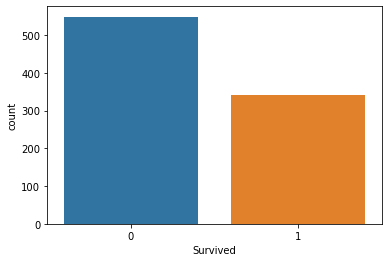

In [11]:
# Plot the frequency of each value of Predictor variable
sns.countplot(x='Survived', data=titanic_train)

Passengers paying high fare had higher chances of survival

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

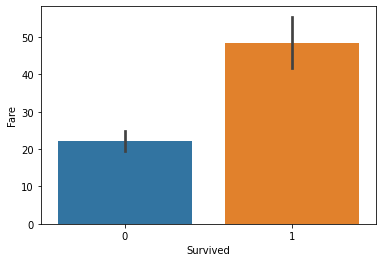

In [12]:
# Plot of survival vs fare price
sns.barplot(x='Survived', y='Fare', data=titanic_train)

In [13]:
# Number male and female passengers
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

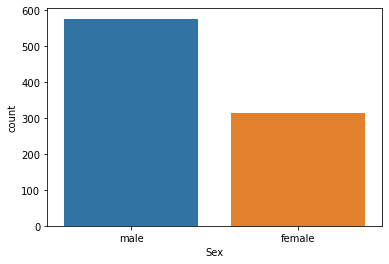

In [14]:
sns.countplot(x='Sex', data=titanic_train)

There were more male passengers than female

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

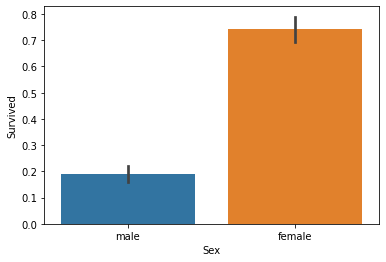

In [15]:
# Survival based on sex
sns.barplot(x='Sex', y='Survived', data=titanic_train)

Female passengers survived more than Male

In [16]:
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Pclass = 3 had maximum passengers

In [17]:
# Number of Passengers on various Pclass
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

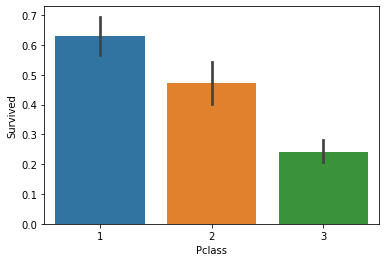

In [18]:
# Survival on the basis of Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic_train)

Although Pclass = 3 had maximum number of passengers, very few survived

In [19]:
# % of passengers survived in each class
titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Most people were in the group 15-35 years of age

<AxesSubplot:xlabel='Age', ylabel='Count'>

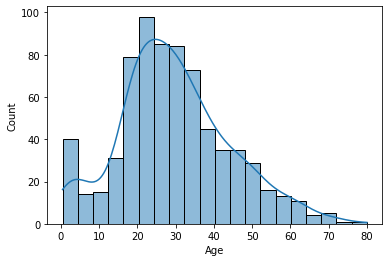

In [20]:
# Histogram plot of age
sns.histplot(data = titanic_train['Age'], kde = True)

Observations:
- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.


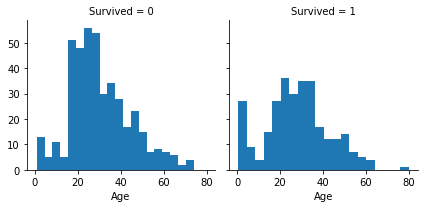

In [21]:
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

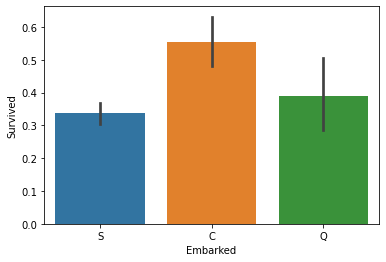

In [22]:
# Survival on the basis of Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_train)

In [23]:
titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [24]:
# Checking correlation among various numerical variables
titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

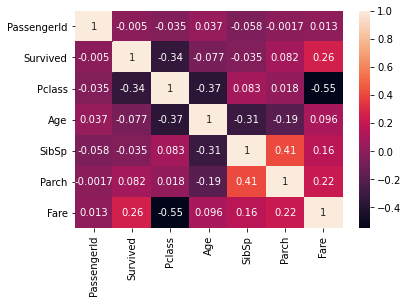

In [25]:
sns.heatmap(titanic_train.corr(), annot=True)

### Assumptions based on analysis so far:
- Impute the missing Age values
- Impute the missing Embarked values
- drop Cabin [too many missing values]
- drop Ticket [many duplicates]
- drop PassengerID [not helpful]
- drop Name [not helpful]
- drop SibSp and Parch as well

## Data Cleaning

In [26]:
titanic_train.drop(['Name', 'Cabin', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

In [27]:
# impute the missing age values with the mean 
titanic_train['Age'].fillna(value=titanic_train['Age'].mean(), inplace=True)

In [28]:
# drop the  observations having missing Embarked (as only 2 of them are missing)
titanic_train.dropna(axis=0, inplace=True)

In [29]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


Test set

In [30]:
titanic_test.drop(['Name', 'Cabin', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

In [31]:
# impute the missing age values with the mean 
titanic_test['Age'].fillna(value=titanic_train['Age'].mean(), inplace=True)

In [32]:
# drop the  observations having missing Embarked (as only 2 of them are missing)
titanic_test.dropna(axis=0, inplace=True)

In [33]:
titanic_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


## Feature Engineering

Age is a continous variable and I would like to continous numerical feature into an ordinal categorical feature

In [34]:
titanic_train.loc[ titanic_train['Age'] <= 16, 'Age'] = 0
titanic_train.loc[(titanic_train['Age'] > 16) & (titanic_train['Age'] <= 32), 'Age'] = 1
titanic_train.loc[(titanic_train['Age'] > 32) & (titanic_train['Age'] <= 48), 'Age'] = 2
titanic_train.loc[(titanic_train['Age'] > 48) & (titanic_train['Age'] <= 64), 'Age'] = 3
titanic_train.loc[ titanic_train['Age'] > 64, 'Age']

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [35]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,1.0,7.2500,S
1,1,1,female,2.0,71.2833,C
2,1,3,female,1.0,7.9250,S
3,1,1,female,2.0,53.1000,S
4,0,3,male,2.0,8.0500,S


In [36]:
X_train = titanic_train.iloc[:, 1:].values
y_train = titanic_train.iloc[:, :1].values.ravel()

In [37]:
print(X_train.shape)
print(y_train.shape)

(889, 5)
(889,)


In [38]:
# Encoding the Sex variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)

In [39]:
# Encoding the Emberked variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)

In [40]:
X_train.shape

(889, 8)

In [41]:
X_train

array([[0.0, 0.0, 1.0, ..., 3, 1.0, 7.25],
       [1.0, 0.0, 0.0, ..., 1, 2.0, 71.2833],
       [0.0, 0.0, 1.0, ..., 3, 1.0, 7.925],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 1.0, 23.45],
       [1.0, 0.0, 0.0, ..., 1, 1.0, 30.0],
       [0.0, 1.0, 0.0, ..., 3, 1.0, 7.75]], dtype=object)

### For the test set

In [42]:
titanic_test.loc[ titanic_test['Age'] <= 16, 'Age'] = 0
titanic_test.loc[(titanic_test['Age'] > 16) & (titanic_test['Age'] <= 32), 'Age'] = 1
titanic_test.loc[(titanic_test['Age'] > 32) & (titanic_test['Age'] <= 48), 'Age'] = 2
titanic_test.loc[(titanic_test['Age'] > 48) & (titanic_test['Age'] <= 64), 'Age'] = 3
titanic_test.loc[ titanic_test['Age'] > 64, 'Age']

titanic_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,2.0,7.8292,Q
1,3,female,2.0,7.0000,S
2,2,male,3.0,9.6875,Q
3,3,male,1.0,8.6625,S
4,3,female,1.0,12.2875,S


In [43]:
titanic_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,2.0,7.8292,Q
1,3,female,2.0,7.0000,S
2,2,male,3.0,9.6875,Q
3,3,male,1.0,8.6625,S
4,3,female,1.0,12.2875,S


In [44]:
X_test = titanic_test.iloc[:, :].values

In [45]:
# Encoding the Sex variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_test = columnTransformer.fit_transform(X_test)

In [46]:
# Encoding the Emberked variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_test = columnTransformer.fit_transform(X_test)

In [47]:
X_test.shape

(417, 8)

In [48]:
X_test

array([[0.0, 1.0, 0.0, ..., 3, 2.0, 7.8292],
       [0.0, 0.0, 1.0, ..., 3, 2.0, 7.0],
       [0.0, 1.0, 0.0, ..., 2, 3.0, 9.6875],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 2.0, 7.25],
       [0.0, 0.0, 1.0, ..., 3, 1.0, 8.05],
       [1.0, 0.0, 0.0, ..., 3, 1.0, 22.3583]], dtype=object)

## Modelling

In [49]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/home/piyalbanik/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


78.07

In [50]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

68.39

In [51]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.26

In [52]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.95

In [53]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.03

In [54]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.03

## Evaluation

In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.03
5,Decision Tree,93.03
1,KNN,85.26
2,Logistic Regression,78.07
4,Naive Bayes,77.95
0,Support Vector Machines,68.39
